# Paper Health impacts of air pollution exposure from 1990 to 2019 in 35 Lat countries 


In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import os
import pandas as pd
# ubicacion de los archivos
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
print("librerias ok")



librerias ok


In [231]:
#Directorio
os.chdir("D:/Josefina/Proyectos/Seba/health_impact/data")
data = pd.read_csv("LAT.csv")
data

,Measure,Location,Sex,Age,Cause,Risk,Metric,Year,Value,Upper,Lower,SDI_1990,SDI_2019,categoria_SDI_2018,GNI_1990,GNI_2019,Clasification
0,Deaths,Trinidad and Tobago,Male,<5 years,All causes,Air pollution,Number,1990,1.513698e+01,3.270797e+01,2.673046e+00,0.618,0.757,medium,3570.0,15740.0,high-income
1,Deaths,Trinidad and Tobago,Male,<5 years,All causes,Ambient particulate matter pollution,Number,1990,1.477347e+01,3.226273e+01,2.540454e+00,0.618,0.757,medium,3570.0,15740.0,high-income
2,Deaths,Trinidad and Tobago,Male,<5 years,All causes,Household air pollution from solid fuels,Number,1990,3.635137e-01,1.201493e+00,4.584431e-02,0.618,0.757,medium,3570.0,15740.0,high-income
3,Deaths,Trinidad and Tobago,Female,<5 years,All causes,Air pollution,Number,1990,1.137185e+01,2.362533e+01,2.275408e+00,0.618,0.757,medium,3570.0,15740.0,high-income
4,Deaths,Trinidad and Tobago,Female,<5 years,All causes,Ambient particulate matter pollution,Number,1990,1.109564e+01,2.316276e+01,2.147203e+00,0.618,0.757,medium,3570.0,15740.0,high-income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45865,DALYs,Guatemala,Both sexes,All ages,All causes,All risk factors,Number,1990,2.851871e+06,3.116388e+06,2.599810e+06,0.315,0.526,low,930.0,4620.0,uppermiddle
45866,DALYs,Guatemala,Both sexes,All ages,All causes,All risk factors,Rate,1990,3.579802e+04,3.911836e+04,3.263403e+04,0.315,0.526,low,930.0,4620.0,uppermiddle
45867,DALYs,Guatemala,Both sexes,Age-standardized,All causes,All risk factors,Rate,1990,3.324613e+04,3.607805e+04,3.034306e+04,0.315,0.526,low,930.0,4620.0,uppermiddle
45868,DALYs,Haiti,Both sexes,All ages,All causes,All risk factors,Number,1990,2.876772e+06,3.278991e+06,2.535833e+06,0.307,0.432,low,420.0,1410.0,uppermiddle


In [3]:
# Funcion para filtrar los datos de las columnas
def filtrado (data, Measure, Metric, Risk, Cause, Age, Sex, Year):
    df_filtrado = data[(data['Measure'] == Measure) & (data['Metric'] == Metric) & (data['Risk'] == Risk) & (data['Age'] == Age)& (data['Sex'] == Sex)& (data['Cause'] == Cause)  & (data['Year'] == Year)]
    return df_filtrado

prueba_filtro = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "70+ years", Sex="Both sexes", Year=2019)
len(prueba_filtro)

35

# Tabla 1

In [4]:
# ALL CAUSES
## --------  Air pollution
num_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)

print("Deaths (thousands) - All causes - Air pollution = ",round(num_death_airPol_allCause['Value'].sum()/1000,1))
##
rate_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)

# Calcular el IQR
IQR_rate_death_airPol_allCause = round(np.percentile(rate_death_airPol_allCause['Value'], 75) - np.percentile(rate_death_airPol_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_death_airPol_allCause['Value'].median(),1),"(",IQR_rate_death_airPol_allCause,")")
##
rate_DALYs_airPol_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_rate_DALYs_airPol_allCause = round(np.percentile(rate_DALYs_airPol_allCause['Value'], 75) - np.percentile(rate_DALYs_airPol_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_DALYs_airPol_allCause['Value'].median(),1),"(",IQR_rate_DALYs_airPol_allCause,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - All causes - aPM2.5 = ",round(num_death_apm25_allCause['Value'].sum()/1000,1))
##
rate_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_rate_death_apm25_allCause = round(np.percentile(rate_death_apm25_allCause['Value'], 75) - np.percentile(rate_death_apm25_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_death_apm25_allCause['Value'].median(),1),"(",IQR_rate_death_apm25_allCause,")")
##
rate_DALYs_apm25_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_apm25_allCause = round(np.percentile(rate_DALYs_apm25_allCause['Value'], 75) - np.percentile(rate_DALYs_apm25_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_DALYs_apm25_allCause['Value'].median(),1),"(",IQR_DALYs_apm25_allCause,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - All causes - Household = ",round(num_death_household_allCause['Value'].sum()/1000,1))

# ##
rate_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_death_household_allCause  = round(np.percentile(rate_death_household_allCause['Value'], 75) - np.percentile(rate_death_household_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Household = ",round(rate_death_household_allCause['Value'].median(),1),"(",IQR_death_household_allCause,")")
##
rate_DALYs_household_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_household_allCause  = round(np.percentile(rate_DALYs_household_allCause['Value'], 75) - np.percentile(rate_DALYs_household_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household = ",round(rate_DALYs_household_allCause['Value'].median(),1),"(",IQR_DALYs_household_allCause,")")
print("-------------------------------------------------------")


# ## ----------- Ambient ozone pollution
num_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - Ozone - Household = ",round(num_death_ozone_allCause['Value'].sum()/1000,1))
###
rate_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_death_ozone_allCause  = round(np.percentile(rate_death_ozone_allCause['Value'], 75) - np.percentile(rate_death_ozone_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_death_ozone_allCause['Value'].median(),1),"(",IQR_death_ozone_allCause,")")
# ##
rate_DALYs_ozone_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_ozone_allCause = round(np.percentile(rate_DALYs_ozone_allCause['Value'], 75) - np.percentile(rate_DALYs_ozone_allCause['Value'], 25),1)

print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_DALYs_ozone_allCause['Value'].median(),1),"(",IQR_DALYs_ozone_allCause,")")
print("-------------------------------------------------------")

Deaths (thousands) - All causes - Air pollution =  234.0
Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution =  41.5 ( 24.9 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution =  1105.8 ( 603.4 )
-------------------------------------------------------
Deaths (thousands) - All causes - aPM2.5 =  167.8
Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 =  30.7 ( 14.6 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 =  788.3 ( 486.6 )
-------------------------------------------------------
Deaths (thousands) - All causes - Household =  59.3
Median age standardised death rate per 100,000 (IQR) - All causes - Household =  3.7 ( 8.5 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household =  121.6 ( 239.9 )
-------------------------------------------------------
Deaths (thousands) - Ozone - Household =  8.0
Median age standardised death rate per 100,000 (IQ

In [14]:

causa = "All causes"
## --------  Air pollution
num_death_airPol_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - IHD - Air pollution = ",round(num_death_airPol_IHD['Value'].sum()/1000,1))
##
rate_death_airPol_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
# Calcular el IQR
IQR_rate_death_airPol_IHD = round(np.percentile(rate_death_airPol_IHD['Value'], 75) - np.percentile(rate_death_airPol_IHD['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - IHD - Air pollution = ",round(rate_death_airPol_IHD['Value'].median(),1),"(",IQR_rate_death_airPol_IHD,")")

#######
rate_DALYs_airPol_IHD = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_rate_DALYs_airPol_IHD = round(np.percentile(rate_DALYs_airPol_IHD['Value'], 75) - np.percentile(rate_DALYs_airPol_IHD['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - IHD - Air pollution = ",round(rate_DALYs_airPol_IHD['Value'].median(),1),"(",IQR_rate_DALYs_airPol_IHD,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause= causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - IHD - aPM2.5 = ",round(num_death_apm25_IHD['Value'].sum()/1000,1))
##
rate_death_apm25_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause= causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)

IQR_rate_death_apm25_IHD= round(np.percentile(rate_death_apm25_IHD['Value'], 75) - np.percentile(rate_death_apm25_IHD['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - IHD - aPM2.5 = ",round(rate_death_apm25_IHD['Value'].median(),1),"(",IQR_rate_death_apm25_IHD,")")
##
rate_DALYs_apm25_IHD = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_apm25_IHD = round(np.percentile(rate_DALYs_apm25_IHD['Value'], 75) - np.percentile(rate_DALYs_apm25_IHD['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - IHD - aPM2.5 = ",round(rate_DALYs_apm25_IHD['Value'].median(),1),"(",IQR_DALYs_apm25_IHD,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - IHD - Household = ",round(num_death_household_IHD['Value'].sum()/1000,1))

# ##
rate_death_household_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_death_household_IHD  = round(np.percentile(rate_death_household_IHD['Value'], 75) - np.percentile(rate_death_household_IHD['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - IHD - Household = ",round(rate_death_household_IHD['Value'].median(),1),"(",IQR_death_household_IHD,")")
##
rate_DALYs_household_IHD = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause= causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_household_IHD  = round(np.percentile(rate_DALYs_household_IHD['Value'], 75) - np.percentile(rate_DALYs_household_IHD['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - IHD- Household = ",round(rate_DALYs_household_IHD['Value'].median(),1),"(",IQR_DALYs_household_IHD,")")
print("-------------------------------------------------------")




Deaths (thousands) - IHD - Air pollution =  234.0
Median age standardised death rate per 100,000 (IQR) - IHD - Air pollution =  41.5 ( 24.9 )
Median age standardised DALYs rate per 100,000 (IQR) - IHD - Air pollution =  1105.8 ( 603.4 )
-------------------------------------------------------
Deaths (thousands) - IHD - aPM2.5 =  167.8
Median age standardised death rate per 100,000 (IQR) - IHD - aPM2.5 =  30.7 ( 14.6 )
Median age standardised DALYs rate per 100,000 (IQR) - IHD - aPM2.5 =  788.3 ( 486.6 )
-------------------------------------------------------
Deaths (thousands) - IHD - Household =  59.3
Median age standardised death rate per 100,000 (IQR) - IHD - Household =  3.7 ( 8.5 )
Median age standardised DALYs rate per 100,000 (IQR) - IHD- Household =  121.6 ( 239.9 )
-------------------------------------------------------


In [8]:
print(" --------------------- AIR POLLUTION  ---------------------")
causa = "Stroke"
## --------  Air pollution
num_death_airPol_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - Stroke - Air pollution = ",round(num_death_airPol_Stroke['Value'].sum()/1000,1))
##
rate_death_airPol_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
# Calcular el IQR
IQR_rate_death_airPol_Stroke = round(np.percentile(rate_death_airPol_Stroke['Value'], 75) - np.percentile(rate_death_airPol_Stroke['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - Stroke - Air pollution = ",round(rate_death_airPol_Stroke['Value'].median(),1),"(",IQR_rate_death_airPol_Stroke,")")

#######
rate_DALYs_airPol_Stroke = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_rate_DALYs_airPol_Stroke = round(np.percentile(rate_DALYs_airPol_Stroke['Value'], 75) - np.percentile(rate_DALYs_airPol_Stroke['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - Stroke - Air pollution = ",round(rate_DALYs_airPol_Stroke['Value'].median(),1),"(",IQR_rate_DALYs_airPol_Stroke,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - Stroke - aPM2.5 = ",round(num_death_apm25_Stroke['Value'].sum()/1000,1))
##
rate_death_apm25_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)

IQR_rate_death_apm25_Stroke = round(np.percentile(rate_death_apm25_Stroke['Value'], 75) - np.percentile(rate_death_apm25_Stroke['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - Stroke - aPM2.5 = ",round(rate_death_apm25_Stroke['Value'].median(),1),"(",IQR_rate_death_apm25_Stroke,")")
##
rate_DALYs_apm25_Stroke = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_apm25_Stroke = round(np.percentile(rate_DALYs_apm25_Stroke['Value'], 75) - np.percentile(rate_DALYs_apm25_Stroke['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - Stroke - aPM2.5 = ",round(rate_DALYs_apm25_Stroke['Value'].median(),1),"(",IQR_DALYs_apm25_Stroke,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - Stroke - Household = ",round(num_death_household_Stroke['Value'].sum()/1000,1))

# ##
rate_death_household_Stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause= causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_death_household_Stroke  = round(np.percentile(rate_death_household_Stroke['Value'], 75) - np.percentile(rate_death_household_Stroke['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - Stroke - Household = ",round(rate_death_household_Stroke['Value'].median(),1),"(",IQR_death_household_Stroke,")")
##
rate_DALYs_household_Stroke = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_household_Stroke  = round(np.percentile(rate_DALYs_household_Stroke['Value'], 75) - np.percentile(rate_DALYs_household_Stroke['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - Stroke- Household = ",round(rate_DALYs_household_Stroke['Value'].median(),1),"(",IQR_DALYs_household_Stroke,")")
print("-------------------------------------------------------")



Deaths (thousands) - Stroke - Air pollution =  47.6
Median age standardised death rate per 100,000 (IQR) - Stroke - Air pollution =  9.1 ( 6.9 )
Median age standardised DALYs rate per 100,000 (IQR) - Stroke - Air pollution =  211.5 ( 141.6 )
-------------------------------------------------------
Deaths (thousands) - Stroke - aPM2.5 =  34.1
Median age standardised death rate per 100,000 (IQR) - Stroke - aPM2.5 =  6.6 ( 4.9 )
Median age standardised DALYs rate per 100,000 (IQR) - Stroke - aPM2.5 =  156.4 ( 104.6 )
-------------------------------------------------------
Deaths (thousands) - Stroke - Household =  13.5
Median age standardised death rate per 100,000 (IQR) - Stroke - Household =  0.9 ( 2.3 )
Median age standardised DALYs rate per 100,000 (IQR) - Stroke- Household =  20.4 ( 56.8 )
-------------------------------------------------------


In [11]:

causa = "Tracheal, bronchus, and lung cancer"
## --------  Air pollution
num_death_airPol_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - TRL - Air pollution = ",round(num_death_airPol_TRL['Value'].sum()/1000,1))
##
rate_death_airPol_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
# Calcular el IQR
IQR_rate_death_airPol_TRL = round(np.percentile(rate_death_airPol_TRL['Value'], 75) - np.percentile(rate_death_airPol_TRL['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - TRL - Air pollution = ",round(rate_death_airPol_TRL['Value'].median(),1),"(",IQR_rate_death_airPol_TRL,")")

#######
rate_DALYs_airPol_TRL = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_rate_DALYs_airPol_TRL = round(np.percentile(rate_DALYs_airPol_TRL['Value'], 75) - np.percentile(rate_DALYs_airPol_TRL['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - TRL - Air pollution = ",round(rate_DALYs_airPol_TRL['Value'].median(),1),"(",IQR_rate_DALYs_airPol_TRL,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - TRL - aPM2.5 = ",round(num_death_apm25_TRL['Value'].sum()/1000,1))
##
rate_death_apm25_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)

IQR_rate_death_apm25_TRL = round(np.percentile(rate_death_apm25_TRL['Value'], 75) - np.percentile(rate_death_apm25_TRL['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - TRL - aPM2.5 = ",round(rate_death_apm25_TRL['Value'].median(),1),"(",IQR_rate_death_apm25_TRL,")")
##
rate_DALYs_apm25_TRL = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_apm25_TRL = round(np.percentile(rate_DALYs_apm25_TRL['Value'], 75) - np.percentile(rate_DALYs_apm25_TRL['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - TRL - aPM2.5 = ",round(rate_DALYs_apm25_TRL['Value'].median(),1),"(",IQR_DALYs_apm25_TRL,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "All ages", Sex="Both sexes", Year=2019)
print("Deaths (thousands) - TRL - Household = ",round(num_death_household_TRL['Value'].sum()/1000,1))

# ##
rate_death_household_TRL = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause= causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_death_household_TRL  = round(np.percentile(rate_death_household_TRL['Value'], 75) - np.percentile(rate_death_household_TRL['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - TRL - Household = ",round(rate_death_household_TRL['Value'].median(),1),"(",IQR_death_household_TRL,")")
##
rate_DALYs_household_TRL = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex="Both sexes", Year=2019)
IQR_DALYs_household_TRL  = round(np.percentile(rate_DALYs_household_TRL['Value'], 75) - np.percentile(rate_DALYs_household_TRL['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - TRL- Household = ",round(rate_DALYs_household_TRL['Value'].median(),1),"(",IQR_DALYs_household_TRL,")")
print("-------------------------------------------------------")





Deaths (thousands) - TRL - Air pollution =  13.2
Median age standardised death rate per 100,000 (IQR) - TRL - Air pollution =  2.1 ( 0.9 )
Median age standardised DALYs rate per 100,000 (IQR) - TRL - Air pollution =  43.9 ( 23.9 )
-------------------------------------------------------
Deaths (thousands) - TRL - aPM2.5 =  10.6
Median age standardised death rate per 100,000 (IQR) - TRL - aPM2.5 =  1.5 ( 0.8 )
Median age standardised DALYs rate per 100,000 (IQR) - TRL - aPM2.5 =  36.4 ( 20.0 )
-------------------------------------------------------
Deaths (thousands) - TRL - Household =  2.5
Median age standardised death rate per 100,000 (IQR) - TRL - Household =  0.2 ( 0.3 )
Median age standardised DALYs rate per 100,000 (IQR) - TRL- Household =  3.6 ( 7.9 )
-------------------------------------------------------


In [15]:
causa = "All causes"
genero = "Female"
# ALL CAUSES
## --------  Air pollution
num_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= causa, Age = "All ages", Sex=genero, Year=2019)

print("Deaths (thousands) - All causes - Air pollution = ",round(num_death_airPol_allCause['Value'].sum()/1000,1))
##
rate_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)

# Calcular el IQR
IQR_rate_death_airPol_allCause = round(np.percentile(rate_death_airPol_allCause['Value'], 75) - np.percentile(rate_death_airPol_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_death_airPol_allCause['Value'].median(),1),"(",IQR_rate_death_airPol_allCause,")")
##
rate_DALYs_airPol_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_rate_DALYs_airPol_allCause = round(np.percentile(rate_DALYs_airPol_allCause['Value'], 75) - np.percentile(rate_DALYs_airPol_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_DALYs_airPol_allCause['Value'].median(),1),"(",IQR_rate_DALYs_airPol_allCause,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "All ages", Sex=genero, Year=2019)
print("Deaths (thousands) - All causes - aPM2.5 = ",round(num_death_apm25_allCause['Value'].sum()/1000,1))
##
rate_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_rate_death_apm25_allCause = round(np.percentile(rate_death_apm25_allCause['Value'], 75) - np.percentile(rate_death_apm25_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_death_apm25_allCause['Value'].median(),1),"(",IQR_rate_death_apm25_allCause,")")
##
rate_DALYs_apm25_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex= genero, Year=2019)
IQR_DALYs_apm25_allCause = round(np.percentile(rate_DALYs_apm25_allCause['Value'], 75) - np.percentile(rate_DALYs_apm25_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_DALYs_apm25_allCause['Value'].median(),1),"(",IQR_DALYs_apm25_allCause,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "All ages", Sex= genero, Year=2019)
print("Deaths (thousands) - All causes - Household = ",round(num_death_household_allCause['Value'].sum()/1000,1))

# ##
rate_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex= genero, Year=2019)
IQR_death_household_allCause  = round(np.percentile(rate_death_household_allCause['Value'], 75) - np.percentile(rate_death_household_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Household = ",round(rate_death_household_allCause['Value'].median(),1),"(",IQR_death_household_allCause,")")
##
rate_DALYs_household_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_DALYs_household_allCause  = round(np.percentile(rate_DALYs_household_allCause['Value'], 75) - np.percentile(rate_DALYs_household_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household = ",round(rate_DALYs_household_allCause['Value'].median(),1),"(",IQR_DALYs_household_allCause,")")
print("-------------------------------------------------------")


# ## ----------- Ambient ozone pollution
num_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "All ages", Sex=genero, Year=2019)
print("Deaths (thousands) - Ozone - Household = ",round(num_death_ozone_allCause['Value'].sum()/1000,1))
###
rate_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex=genero, Year=2019)
IQR_death_ozone_allCause  = round(np.percentile(rate_death_ozone_allCause['Value'], 75) - np.percentile(rate_death_ozone_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_death_ozone_allCause['Value'].median(),1),"(",IQR_death_ozone_allCause,")")
# ##
rate_DALYs_ozone_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex=genero, Year=2019)
IQR_DALYs_ozone_allCause = round(np.percentile(rate_DALYs_ozone_allCause['Value'], 75) - np.percentile(rate_DALYs_ozone_allCause['Value'], 25),1)

print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_DALYs_ozone_allCause['Value'].median(),1),"(",IQR_DALYs_ozone_allCause,")")
print("-------------------------------------------------------")


Deaths (thousands) - All causes - Air pollution =  110.1
Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution =  34.8 ( 20.9 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution =  951.9 ( 547.9 )
-------------------------------------------------------
Deaths (thousands) - All causes - aPM2.5 =  75.1
Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 =  26.0 ( 14.4 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 =  665.9 ( 438.8 )
-------------------------------------------------------
Deaths (thousands) - All causes - Household =  31.9
Median age standardised death rate per 100,000 (IQR) - All causes - Household =  4.0 ( 8.8 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household =  118.2 ( 240.8 )
-------------------------------------------------------
Deaths (thousands) - Ozone - Household =  3.7
Median age standardised death rate per 100,000 (IQR)

In [16]:
causa = "All causes"
genero = "Male"
# ALL CAUSES
## --------  Air pollution
num_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= causa, Age = "All ages", Sex=genero, Year=2019)

print("Deaths (thousands) - All causes - Air pollution = ",round(num_death_airPol_allCause['Value'].sum()/1000,1))
##
rate_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)

# Calcular el IQR
IQR_rate_death_airPol_allCause = round(np.percentile(rate_death_airPol_allCause['Value'], 75) - np.percentile(rate_death_airPol_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_death_airPol_allCause['Value'].median(),1),"(",IQR_rate_death_airPol_allCause,")")
##
rate_DALYs_airPol_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_rate_DALYs_airPol_allCause = round(np.percentile(rate_DALYs_airPol_allCause['Value'], 75) - np.percentile(rate_DALYs_airPol_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_DALYs_airPol_allCause['Value'].median(),1),"(",IQR_rate_DALYs_airPol_allCause,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "All ages", Sex=genero, Year=2019)
print("Deaths (thousands) - All causes - aPM2.5 = ",round(num_death_apm25_allCause['Value'].sum()/1000,1))
##
rate_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_rate_death_apm25_allCause = round(np.percentile(rate_death_apm25_allCause['Value'], 75) - np.percentile(rate_death_apm25_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_death_apm25_allCause['Value'].median(),1),"(",IQR_rate_death_apm25_allCause,")")
##
rate_DALYs_apm25_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = "Age-standardized", Sex= genero, Year=2019)
IQR_DALYs_apm25_allCause = round(np.percentile(rate_DALYs_apm25_allCause['Value'], 75) - np.percentile(rate_DALYs_apm25_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_DALYs_apm25_allCause['Value'].median(),1),"(",IQR_DALYs_apm25_allCause,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "All ages", Sex= genero, Year=2019)
print("Deaths (thousands) - All causes - Household = ",round(num_death_household_allCause['Value'].sum()/1000,1))

# ##
rate_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex= genero, Year=2019)
IQR_death_household_allCause  = round(np.percentile(rate_death_household_allCause['Value'], 75) - np.percentile(rate_death_household_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Household = ",round(rate_death_household_allCause['Value'].median(),1),"(",IQR_death_household_allCause,")")
##
rate_DALYs_household_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = "Age-standardized", Sex=genero, Year=2019)
IQR_DALYs_household_allCause  = round(np.percentile(rate_DALYs_household_allCause['Value'], 75) - np.percentile(rate_DALYs_household_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household = ",round(rate_DALYs_household_allCause['Value'].median(),1),"(",IQR_DALYs_household_allCause,")")
print("-------------------------------------------------------")


# ## ----------- Ambient ozone pollution
num_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "All ages", Sex=genero, Year=2019)
print("Deaths (thousands) - Ozone - Household = ",round(num_death_ozone_allCause['Value'].sum()/1000,1))
###
rate_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex=genero, Year=2019)
IQR_death_ozone_allCause  = round(np.percentile(rate_death_ozone_allCause['Value'], 75) - np.percentile(rate_death_ozone_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_death_ozone_allCause['Value'].median(),1),"(",IQR_death_ozone_allCause,")")
# ##
rate_DALYs_ozone_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = "Age-standardized", Sex=genero, Year=2019)
IQR_DALYs_ozone_allCause = round(np.percentile(rate_DALYs_ozone_allCause['Value'], 75) - np.percentile(rate_DALYs_ozone_allCause['Value'], 25),1)

print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_DALYs_ozone_allCause['Value'].median(),1),"(",IQR_DALYs_ozone_allCause,")")
print("-------------------------------------------------------")


Deaths (thousands) - All causes - Air pollution =  123.9
Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution =  45.7 ( 26.2 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution =  1309.4 ( 701.0 )
-------------------------------------------------------
Deaths (thousands) - All causes - aPM2.5 =  92.7
Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 =  35.1 ( 16.9 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 =  930.3 ( 476.8 )
-------------------------------------------------------
Deaths (thousands) - All causes - Household =  27.4
Median age standardised death rate per 100,000 (IQR) - All causes - Household =  3.6 ( 8.1 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household =  124.6 ( 242.2 )
-------------------------------------------------------
Deaths (thousands) - Ozone - Household =  4.4
Median age standardised death rate per 100,000 (IQR

In [17]:
causa = "All causes"
genero = "Both sexes"
edad =  "70+ years"
# ALL CAUSES
## --------  Air pollution
num_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= causa, Age = edad, Sex=genero, Year=2019)

print("Deaths (thousands) - All causes - Air pollution = ",round(num_death_airPol_allCause['Value'].sum()/1000,1))
##
rate_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)

# Calcular el IQR
IQR_rate_death_airPol_allCause = round(np.percentile(rate_death_airPol_allCause['Value'], 75) - np.percentile(rate_death_airPol_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_death_airPol_allCause['Value'].median(),1),"(",IQR_rate_death_airPol_allCause,")")
##
rate_DALYs_airPol_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_rate_DALYs_airPol_allCause = round(np.percentile(rate_DALYs_airPol_allCause['Value'], 75) - np.percentile(rate_DALYs_airPol_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_DALYs_airPol_allCause['Value'].median(),1),"(",IQR_rate_DALYs_airPol_allCause,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
print("Deaths (thousands) - All causes - aPM2.5 = ",round(num_death_apm25_allCause['Value'].sum()/1000,1))
##
rate_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_rate_death_apm25_allCause = round(np.percentile(rate_death_apm25_allCause['Value'], 75) - np.percentile(rate_death_apm25_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_death_apm25_allCause['Value'].median(),1),"(",IQR_rate_death_apm25_allCause,")")
##
rate_DALYs_apm25_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex= genero, Year=2019)
IQR_DALYs_apm25_allCause = round(np.percentile(rate_DALYs_apm25_allCause['Value'], 75) - np.percentile(rate_DALYs_apm25_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_DALYs_apm25_allCause['Value'].median(),1),"(",IQR_DALYs_apm25_allCause,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex= genero, Year=2019)
print("Deaths (thousands) - All causes - Household = ",round(num_death_household_allCause['Value'].sum()/1000,1))

# ##
rate_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex= genero, Year=2019)
IQR_death_household_allCause  = round(np.percentile(rate_death_household_allCause['Value'], 75) - np.percentile(rate_death_household_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Household = ",round(rate_death_household_allCause['Value'].median(),1),"(",IQR_death_household_allCause,")")
##
rate_DALYs_household_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_DALYs_household_allCause  = round(np.percentile(rate_DALYs_household_allCause['Value'], 75) - np.percentile(rate_DALYs_household_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household = ",round(rate_DALYs_household_allCause['Value'].median(),1),"(",IQR_DALYs_household_allCause,")")
print("-------------------------------------------------------")


# ## ----------- Ambient ozone pollution
num_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause='All causes', Age =edad, Sex=genero, Year=2019)
print("Deaths (thousands) - Ozone - Household = ",round(num_death_ozone_allCause['Value'].sum()/1000,1))
###
rate_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = edad, Sex=genero, Year=2019)
IQR_death_ozone_allCause  = round(np.percentile(rate_death_ozone_allCause['Value'], 75) - np.percentile(rate_death_ozone_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_death_ozone_allCause['Value'].median(),1),"(",IQR_death_ozone_allCause,")")
# ##
rate_DALYs_ozone_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = edad, Sex=genero, Year=2019)
IQR_DALYs_ozone_allCause = round(np.percentile(rate_DALYs_ozone_allCause['Value'], 75) - np.percentile(rate_DALYs_ozone_allCause['Value'], 25),1)

print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_DALYs_ozone_allCause['Value'].median(),1),"(",IQR_DALYs_ozone_allCause,")")
print("-------------------------------------------------------")



Deaths (thousands) - All causes - Air pollution =  128.9
Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution =  406.9 ( 169.1 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution =  6211.6 ( 3047.3 )
-------------------------------------------------------
Deaths (thousands) - All causes - aPM2.5 =  93.7
Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 =  308.6 ( 156.6 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 =  4554.0 ( 2429.8 )
-------------------------------------------------------
Deaths (thousands) - All causes - Household =  29.9
Median age standardised death rate per 100,000 (IQR) - All causes - Household =  39.0 ( 74.5 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household =  736.6 ( 1222.2 )
-------------------------------------------------------
Deaths (thousands) - Ozone - Household =  6.1
Median age standardised death rate per 10

In [18]:
causa = "All causes"
genero = "Both sexes"
edad =  "<5 years"
# ALL CAUSES
## --------  Air pollution
num_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= causa, Age = edad, Sex=genero, Year=2019)

print("Deaths (thousands) - All causes - Air pollution = ",round(num_death_airPol_allCause['Value'].sum()/1000,1))
##
rate_death_airPol_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)

# Calcular el IQR
IQR_rate_death_airPol_allCause = round(np.percentile(rate_death_airPol_allCause['Value'], 75) - np.percentile(rate_death_airPol_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_death_airPol_allCause['Value'].median(),1),"(",IQR_rate_death_airPol_allCause,")")
##
rate_DALYs_airPol_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_rate_DALYs_airPol_allCause = round(np.percentile(rate_DALYs_airPol_allCause['Value'], 75) - np.percentile(rate_DALYs_airPol_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution = ",round(rate_DALYs_airPol_allCause['Value'].median(),1),"(",IQR_rate_DALYs_airPol_allCause,")")

print("-------------------------------------------------------")
## ----------- Ambient particulate matter pollution
num_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
print("Deaths (thousands) - All causes - aPM2.5 = ",round(num_death_apm25_allCause['Value'].sum()/1000,1))
##
rate_death_apm25_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_rate_death_apm25_allCause = round(np.percentile(rate_death_apm25_allCause['Value'], 75) - np.percentile(rate_death_apm25_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_death_apm25_allCause['Value'].median(),1),"(",IQR_rate_death_apm25_allCause,")")
##
rate_DALYs_apm25_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient particulate matter pollution', Cause=causa, Age = edad, Sex= genero, Year=2019)
IQR_DALYs_apm25_allCause = round(np.percentile(rate_DALYs_apm25_allCause['Value'], 75) - np.percentile(rate_DALYs_apm25_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 = ",round(rate_DALYs_apm25_allCause['Value'].median(),1),"(",IQR_DALYs_apm25_allCause,")")

print("-------------------------------------------------------")
# ## ----------- Household air pollution from solid fuels 
num_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex= genero, Year=2019)
print("Deaths (thousands) - All causes - Household = ",round(num_death_household_allCause['Value'].sum()/1000,1))

# ##
rate_death_household_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex= genero, Year=2019)
IQR_death_household_allCause  = round(np.percentile(rate_death_household_allCause['Value'], 75) - np.percentile(rate_death_household_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Household = ",round(rate_death_household_allCause['Value'].median(),1),"(",IQR_death_household_allCause,")")
##
rate_DALYs_household_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Household air pollution from solid fuels', Cause=causa, Age = edad, Sex=genero, Year=2019)
IQR_DALYs_household_allCause  = round(np.percentile(rate_DALYs_household_allCause['Value'], 75) - np.percentile(rate_DALYs_household_allCause['Value'], 25),1)
print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household = ",round(rate_DALYs_household_allCause['Value'].median(),1),"(",IQR_DALYs_household_allCause,")")
print("-------------------------------------------------------")


# ## ----------- Ambient ozone pollution
num_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause='All causes', Age =edad, Sex=genero, Year=2019)
print("Deaths (thousands) - Ozone - Household = ",round(num_death_ozone_allCause['Value'].sum()/1000,1))
###
rate_death_ozone_allCause = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = edad, Sex=genero, Year=2019)
IQR_death_ozone_allCause  = round(np.percentile(rate_death_ozone_allCause['Value'], 75) - np.percentile(rate_death_ozone_allCause['Value'], 25),1)
print("Median age standardised death rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_death_ozone_allCause['Value'].median(),1),"(",IQR_death_ozone_allCause,")")
# ##
rate_DALYs_ozone_allCause = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Ambient ozone pollution', Cause='All causes', Age = edad, Sex=genero, Year=2019)
IQR_DALYs_ozone_allCause = round(np.percentile(rate_DALYs_ozone_allCause['Value'], 75) - np.percentile(rate_DALYs_ozone_allCause['Value'], 25),1)

print("Median age standardised DALYs rate per 100,000 (IQR) - All causes - Ozone = ",round(rate_DALYs_ozone_allCause['Value'].median(),1),"(",IQR_DALYs_ozone_allCause,")")
print("-------------------------------------------------------")


Deaths (thousands) - All causes - Air pollution =  11.0
Median age standardised death rate per 100,000 (IQR) - All causes - Air pollution =  13.0 ( 14.2 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Air pollution =  1151.5 ( 1261.6 )
-------------------------------------------------------
Deaths (thousands) - All causes - aPM2.5 =  5.7
Median age standardised death rate per 100,000 (IQR) - All causes - aPM2.5 =  9.9 ( 7.3 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - aPM2.5 =  879.6 ( 648.6 )
-------------------------------------------------------
Deaths (thousands) - All causes - Household =  5.3
Median age standardised death rate per 100,000 (IQR) - All causes - Household =  1.9 ( 4.9 )
Median age standardised DALYs rate per 100,000 (IQR) - All causes - Household =  165.8 ( 437.1 )
-------------------------------------------------------
Deaths (thousands) - Ozone - Household =  0.0
Median age standardised death rate per 100,000 (IQR) - 

In [192]:
num_death_airPol_allCause_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
num_death_airPol_allCause_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=1990)
diferencia_num_death_airPol_allCause = num_death_airPol_allCause_1990
sum_num_death_airPol_allCause_1990 = round(num_death_airPol_allCause_1990['Value'].sum(),0)
sum_num_death_airPol_allCause_2019 = round(num_death_airPol_allCause_2019['Value'].sum(),0)
dif_num_death_airPol = round(((sum_num_death_airPol_allCause_1990-sum_num_death_airPol_allCause_2019)/sum_num_death_airPol_allCause_1990)*100,2)

print("Hubo un total de ",sum_num_death_airPol_allCause_1990,"muertes en Latinoamérica atribuibles a la contaminación del aire 1990")
print("Hubo un total de ",sum_num_death_airPol_allCause_2019,"muertes en Latinoamérica atribuibles a la contaminación del aire 2019")
print("Con una reducción ",(sum_num_death_airPol_allCause_1990-sum_num_death_airPol_allCause_2019),"muertes (",dif_num_death_airPol,"%)")

# Union de las tablas de 1990 - 2019 para ser comparadas
num_death_airPol_allCause_1990_sub = num_death_airPol_allCause_1990[["Location","Value"]]

num_death_airPol_allCause_2019_sub = num_death_airPol_allCause_2019[["Location","Value"]]
num_death_air_pol_merge = pd.merge(num_death_airPol_allCause_1990_sub, num_death_airPol_allCause_2019_sub, on='Location', how='inner')

num_death_air_pol_merge = num_death_air_pol_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
num_death_air_pol_merge['difference']  = num_death_air_pol_merge['value_1990'] - num_death_air_pol_merge['value_2019']
num_death_air_pol_merge['difference_porc']  = round((((num_death_air_pol_merge['value_1990'] - num_death_air_pol_merge['value_2019'])/num_death_air_pol_merge['value_1990'] )*100),2)
# Paises que redujeron y que aumentaron su concentración anual ponderada por la población de partículas finas (aPM2.5)
paises_reduccion_muertes = num_death_air_pol_merge[num_death_air_pol_merge['difference_porc']>0]
paises_aumentaron_muertes = num_death_air_pol_merge[num_death_air_pol_merge['difference_porc'] < 0]
print("Paises que redujeron las muertes asociadas con la contaminacion atmosferica: ",len(paises_reduccion_muertes))
print("Paises que aumentaron las muertes asociadas con la contaminacion atmosferica: ",len(paises_aumentaron_muertes))
# Pais con mayor disminucion de muertes ordenar de mayor a menor. 
# Los positivps son los que mas disminuyeron, los paises con valores negativos son aquellos que aumentaron el numero de muertes
num_death_air_pol_merge.sort_values(by='difference_porc',ascending=False)

Hubo un total de  244306.0 muertes en Latinoamérica atribuibles a la contaminación del aire 1990
Hubo un total de  234024.0 muertes en Latinoamérica atribuibles a la contaminación del aire 2019
Con una reducción  10282.0 muertes ( 4.21 %)
Paises que redujeron las muertes asociadas con la contaminacion atmosferica:  15
Paises que aumentaron las muertes asociadas con la contaminacion atmosferica:  20


,Location,value_1990,value_2019,difference,difference_porc
16,Bermuda,22.201592,9.618290,12.583302,56.68
21,Saint Kitts and Nevis,22.528942,11.725836,10.803106,47.95
31,Dominica,60.934218,36.969935,23.964283,39.33
33,Grenada,85.552233,53.969736,31.582497,36.92
23,Uruguay,1297.379245,819.838199,477.541046,36.81
20,Brazil,86652.656820,60914.604200,25738.052620,29.70
12,Peru,15697.823810,11413.773550,4284.050260,27.29
15,El Salvador,3439.779395,2574.031951,865.747444,25.17
9,Bolivia (Plurinational State of),8055.244160,6254.744838,1800.499322,22.35
5,Guyana,596.571379,466.153309,130.418070,21.86


In [246]:
rate_death_air_pol_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=1990)
rate_death_air_pol_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# # Union de las tablas de 1990 - 2019 para ser comparadas
rate_death_air_pol_2019_sub =rate_death_air_pol_2019[["Location","Value"]]
rate_death_air_pol_1990_sub = rate_death_air_pol_1990[["Location","Value"]]
rate_death_air_pol_merge = pd.merge(rate_death_air_pol_1990_sub, rate_death_air_pol_2019_sub, on='Location', how='inner')
#Cambio de nombres de las columnas
rate_death_air_pol_merge = rate_death_air_pol_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
# Diferencia
rate_death_air_pol_merge['difference']  = rate_death_air_pol_merge['value_1990'] - rate_death_air_pol_merge['value_2019']
# Diferencia porcentual
rate_death_air_pol_merge['difference_porc']  = round((((rate_death_air_pol_merge['value_1990'] - rate_death_air_pol_merge['value_2019'])/rate_death_air_pol_merge['value_1990'] )*100),2)
rate_death_air_pol_merge

suma_rate_death_air_pol_1990 = rate_death_air_pol_merge['value_1990'].median()
suma_rate_death_air_pol_2019 = rate_death_air_pol_merge['value_2019'].median()

print("Tasa de mortalidad atribuible a la contaminacion 1990 es ",round(suma_rate_death_air_pol_1990,2))
print("Tasa de mortalidad atribuible a la contaminacion 2019 es ",round(suma_rate_death_air_pol_2019,2))
print("La diferencia de Tasa de mortalidad atribuible a la contaminacion entre 1900-2019 es ",round(((suma_rate_death_air_pol_1990 - suma_rate_death_air_pol_2019)/suma_rate_death_air_pol_1990)*100,2))

print(" ------------------------------------------------------------------------- ")
### TODAS LAS CAUSAS
rate_death_all_risk_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'All risk factors', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=1990)
rate_death_all_risk_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'All risk factors', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# # Union de las tablas de 1990 - 2019 para ser comparadas
rate_death_all_risk_2019_sub =rate_death_all_risk_2019[["Location","Value"]]
rate_death_all_risk_1990_sub = rate_death_all_risk_1990[["Location","Value"]]
rate_death_all_risk_merge = pd.merge(rate_death_all_risk_1990_sub, rate_death_all_risk_2019_sub, on='Location', how='inner')
#Cambio de nombres de las columnas
rate_death_all_risk_merge = rate_death_all_risk_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
# Diferencia
rate_death_all_risk_merge['difference']  = rate_death_all_risk_merge['value_1990'] - rate_death_air_pol_merge['value_2019']
# Diferencia porcentual
rate_death_all_risk_merge['difference_porc']  = round((((rate_death_all_risk_merge['value_1990'] - rate_death_all_risk_merge['value_2019'])/rate_death_air_pol_merge['value_1990'] )*100),2)
rate_death_all_risk_merge

suma_rate_death_all_risk_1990 = rate_death_all_risk_merge['value_1990'].median()
suma_rate_death_all_risk_2019 = rate_death_all_risk_merge['value_2019'].median()

print("Tasa de mortalidad de todas las causas en 1990 es ",round(suma_rate_death_all_risk_1990,2))
print("Tasa de mortalidad de todas las causas  en 2019 es ",round(suma_rate_death_all_risk_2019,2))
print("La diferencia de Tasa de mortalidad de todas las causas entre 1900-2019 es ",round(((suma_rate_death_all_risk_1990 - suma_rate_death_all_risk_2019)/suma_rate_death_all_risk_1990)*100,2))

suma_rate_death_all_risk_1990

Tasa de mortalidad atribuible a la contaminacion 1990 es  80.4
Tasa de mortalidad atribuible a la contaminacion 2019 es  41.52
La diferencia de Tasa de mortalidad atribuible a la contaminacion entre 1900-2019 es  48.36
 ------------------------------------------------------------------------- 
Tasa de mortalidad de todas las causas en 1990 es  499.26
Tasa de mortalidad de todas las causas  en 2019 es  403.77
La diferencia de Tasa de mortalidad de todas las causas entre 1900-2019 es  19.13


499.26

# Figure 2. Percent change in number of deaths attributable to air pollution in 2019 compared to 1990.

                              Location  percent_change
27  Venezuela (Bolivarian Republic of)      139.797846
14                            Honduras       83.394094
28                             Bahamas       49.845525
18                              Belize       49.832717
2                  Trinidad and Tobago       38.164917
1                   Dominican Republic       35.130390
30                             Ecuador       28.285889
19                          Costa Rica       27.599150
32                              Mexico       24.260130
8                  Antigua and Barbuda       16.972534
4                             Barbados       15.114658
17                           Nicaragua       14.550784
6                                 Cuba       13.115626
29                            Suriname       11.942172
22                               Haiti       10.323431
34                              Panama        9.717596
7                             Paraguay        8.281926
11        

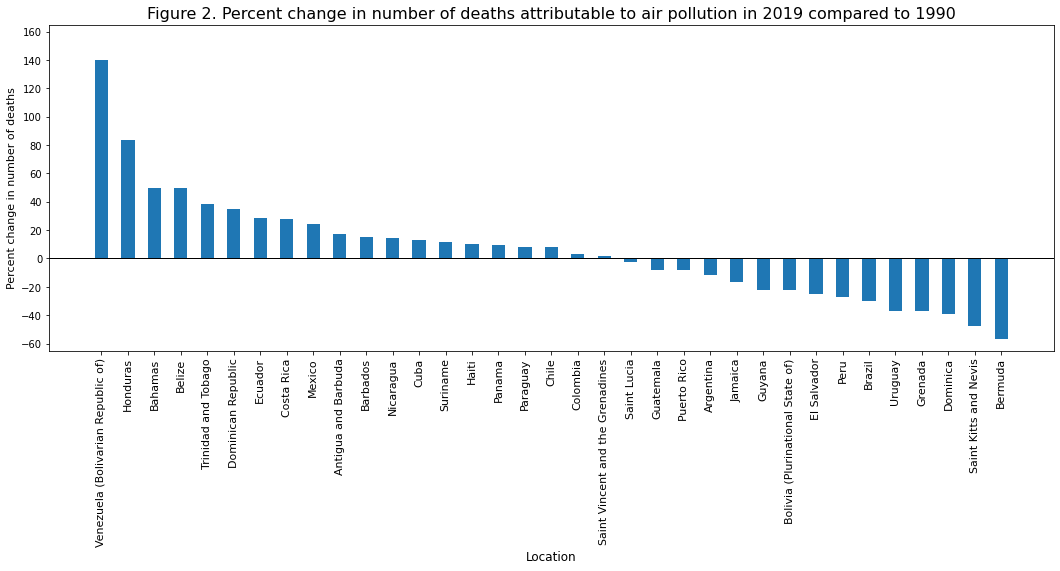

In [44]:
# Filtramos los datos de numeros de muertes atribuible solo a la contaminacion atmosferica tanto para el año 1990 como para 2019
#Año 1990
num_death_air_pol_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=1990)
# Europa len = 35
#len(num_death_air_pol_1990)
#Año 2019
num_death_air_pol_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)

# Europa len = 43
#len(num_death_air_pol_2019)

# Union de las tablas de 1990 - 2019 para ser comparadas
num_death_air_pol_merge = pd.merge(num_death_air_pol_1990, num_death_air_pol_2019, on='Location', how='inner')
#print(num_death_air_pol_merge)
# Cambiamos el nombre de las columnas
#print(num_death_air_pol_merge.columns)
num_death_air_pol_merge = num_death_air_pol_merge.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
# Calculamos el % de cambio
num_death_air_pol_merge['percent_change'] = ((num_death_air_pol_merge['value_2019'] - num_death_air_pol_merge['value_1990']) / num_death_air_pol_merge['value_1990']) *100

#Generamos un df nuevo y solo nos quedamos con las columnas del nombre de los paises y el % de cambio calculado
percent_change_num_death = num_death_air_pol_merge[['Location', 'percent_change']]
# Ordenamos de mayor a menor como esta en el paer
percent_change_num_death = percent_change_num_death.sort_values(by='percent_change',ascending=False)
#print(percent_change_num_death)
print(percent_change_num_death)
# Generamos Gráfico de barras
plt.figure(figsize=(18, 6))
plt.bar(x = percent_change_num_death['Location'], height = percent_change_num_death["percent_change"], width=0.5)
plt.ylim(-65, 165)
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.xticks(rotation=90, fontsize=11)
plt.yticks(range(-60, 170,20))
# Agregar etiquetas a los ejes
plt.xlabel('Location', fontsize=12)  # Etiqueta del eje x
plt.ylabel('Percent change in number of deaths', fontsize=11)  # Etiqueta del eje y

# Agregar título
plt.title('Figure 2. Percent change in number of deaths attributable to air pollution in 2019 compared to 1990', fontsize=16)

# Mostrar el gráfico
plt.show()

# Figure 4. Age-standardised YLL rate per 100,000 and average annual population-weighted aPM2.5 in 2019.

Cause                               Ischemic heart disease   Stroke  \
Location                                                              
Haiti                                              1296.69  1400.62   
Honduras                                            664.01   625.34   
Guyana                                              651.70   578.01   
Dominican Republic                                  552.11   337.90   
Suriname                                            395.13   414.87   
Nicaragua                                           511.11   247.08   
Bolivia (Plurinational State of)                    380.63   345.47   
Guatemala                                           433.10   281.10   
Venezuela (Bolivarian Republic of)                  429.64   203.36   
Grenada                                             319.08   304.46   
Saint Vincent and the Grenadines                    347.54   284.53   
Trinidad and Tobago                                 384.14   214.52   
Paragu

<Figure size 720x1440 with 0 Axes>

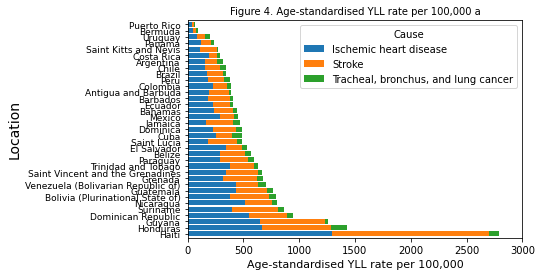

In [77]:
# Ojo que la funcion es otra, serian todas las causas menos all causes
#years of life lost (YLL) 2019
yll_ihd = filtrado_2 (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause = "All causes", Age = "Age-standardized", Sex= "Both sexes", Year= 2019)

# # Europa len = 43 * 3 tipo de enfermedades
len(yll_ihd)

# Agrupar por país y causa, y sumar los valores
df_grouped = yll_ihd.groupby(['Location', 'Cause'])['Value'].sum().unstack()
df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
print(df_grouped)
# Generamos plot de YLL
# Establecer el tamaño de la figura
plt.figure(figsize=(10, 20))
# Crear un gráfico de barras horizontales apiladas
df_grouped.plot(kind='barh', stacked=True, width=0.82)
# Agregar etiquetas a los ejes
plt.xlabel('Age-standardised YLL rate per 100,000', fontsize=11)
plt.ylabel('Location', fontsize=14)
plt.yticks( fontsize=9)
plt.xlim(0, 3000) 
# Agregar título
plt.title('Figure 4. Age-standardised YLL rate per 100,000 a', fontsize=10)
# Mostrar el gráfico
plt.show()

In [315]:
#Principales causas de muerte
num_death_air_pol_2019_IHD = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "Ischemic heart disease", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_stroke = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "Stroke", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_trl = filtrado(data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "Tracheal, bronchus, and lung cancer", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_all_causes = filtrado(data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_all_causes
porc_num_death_air_pol_2019_IHD = round(num_death_air_pol_2019_IHD['Value'].sum() / num_death_air_pol_2019_all_causes['Value'].sum()*100,2)
porc_num_death_air_pol_2019_stroke = round(num_death_air_pol_2019_stroke['Value'].sum() / num_death_air_pol_2019_all_causes['Value'].sum()*100,2)
porc_num_death_air_pol_2019_trl = round(num_death_air_pol_2019_trl['Value'].sum() / num_death_air_pol_2019_all_causes['Value'].sum()*100,2)

print("En Latinoamerica IHD tambien  fue la principal causa de muerte representando el", porc_num_death_air_pol_2019_IHD,"%")
print("En Latinoamerica stroke tambien  fue la principal causa de muerte representando el", porc_num_death_air_pol_2019_stroke,"%")
print("En Latinoamerica trl tambien  fue la principal causa de muerte representando el", porc_num_death_air_pol_2019_trl,"%")

#Principales riesgo de muerte
num_death_air_pol_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_ozone = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient ozone pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_aPM25 = filtrado(data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Ambient particulate matter pollution', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)
num_death_air_pol_2019_all_household = filtrado(data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Household air pollution from solid fuels', Cause= "All causes", Age = "All ages", Sex= "Both sexes", Year=2019)

num_death_air_pol_2019_ozone = round(num_death_air_pol_2019_ozone['Value'].sum() / num_death_air_pol_2019['Value'].sum()*100,2)
num_death_air_pol_2019_aPM25 = round(num_death_air_pol_2019_aPM25['Value'].sum() / num_death_air_pol_2019['Value'].sum()*100,2)
num_death_air_pol_2019_all_household = round(num_death_air_pol_2019_all_household['Value'].sum() / num_death_air_pol_2019['Value'].sum()*100,2)


print("Ozono", num_death_air_pol_2019_ozone,"%")
print("PM25 ambiental", num_death_air_pol_2019_aPM25,"%")
print("Household air pollution from solid fuels", num_death_air_pol_2019_all_household,"%")


En Latinoamerica IHD tambien  fue la principal causa de muerte representando el 31.14 %
En Latinoamerica stroke tambien  fue la principal causa de muerte representando el 20.33 %
En Latinoamerica trl tambien  fue la principal causa de muerte representando el 5.62 %
Ozono 3.42 %
PM25 ambiental 71.71 %
Household air pollution from solid fuels 25.34 %


In [81]:
# Leemos info sobre "Population-Weighted Concentration" https://www.stateofglobalair.org/data/#/air/table
data_pm = pd.read_csv("LAT_PM25.csv")
data_pm

,Exposure Id,Type,Country,ISO3,Region,Name,Exposure Lower,Exposure Mean,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
0,32131,country,Antigua and Barbuda,ATG,region,Caribbean,6.85,18.10,40.10,1990,pm25,PM25,GBD Regions
1,32132,country,Antigua and Barbuda,ATG,region,Caribbean,7.41,18.10,38.70,1995,pm25,PM25,GBD Regions
2,32133,country,Antigua and Barbuda,ATG,region,Caribbean,7.76,18.20,36.60,2000,pm25,PM25,GBD Regions
3,32134,country,Antigua and Barbuda,ATG,region,Caribbean,7.20,16.60,30.60,2005,pm25,PM25,GBD Regions
4,32135,country,Antigua and Barbuda,ATG,region,Caribbean,8.59,16.90,29.30,2010,pm25,PM25,GBD Regions
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,14416,country,Bermuda,BMU,country,Bermuda,5.24,7.01,9.30,2015,pm25,PM25,Country
486,14417,country,Bermuda,BMU,country,Bermuda,5.65,7.46,9.95,2016,pm25,PM25,Country
487,14418,country,Bermuda,BMU,country,Bermuda,5.17,7.20,9.99,2017,pm25,PM25,Country
488,14419,country,Bermuda,BMU,country,Bermuda,5.12,7.15,9.95,2018,pm25,PM25,Country


35


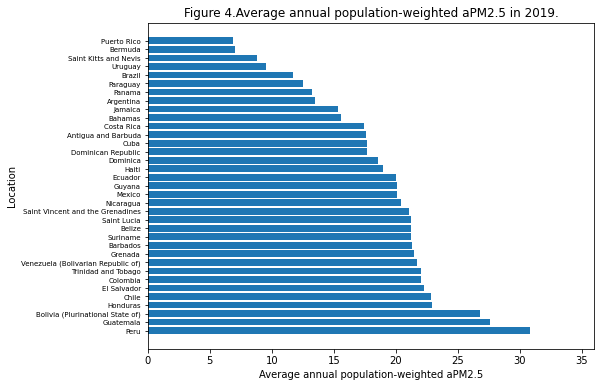

In [85]:
#average annual population-weighted aPM2.5 in 2019
data_pm25_2019 = data_pm[data_pm['Year'] == 2019]

# # Europa len = 43 * 3 tipo de enfermedades
print(len(data_pm25_2019))
data_pm25_2019 = data_pm25_2019.sort_values(by='Exposure Mean',ascending=False)
### PLOT
# Generamos Gráfico de barras
plt.figure(figsize=(8, 6))
# Crear un gráfico de barras horizontales
plt.barh(data_pm25_2019['Country'], data_pm25_2019['Exposure Mean'], height=0.8)
plt.xlim(0, 36) 
# Agregar etiquetas a los ejes
plt.xlabel('Average annual population-weighted aPM2.5')
plt.ylabel('Location')
plt.yticks( fontsize=7)
# Agregar título
plt.title('Figure 4.Average annual population-weighted aPM2.5 in 2019.')

# Mostrar el gráfico
plt.show()

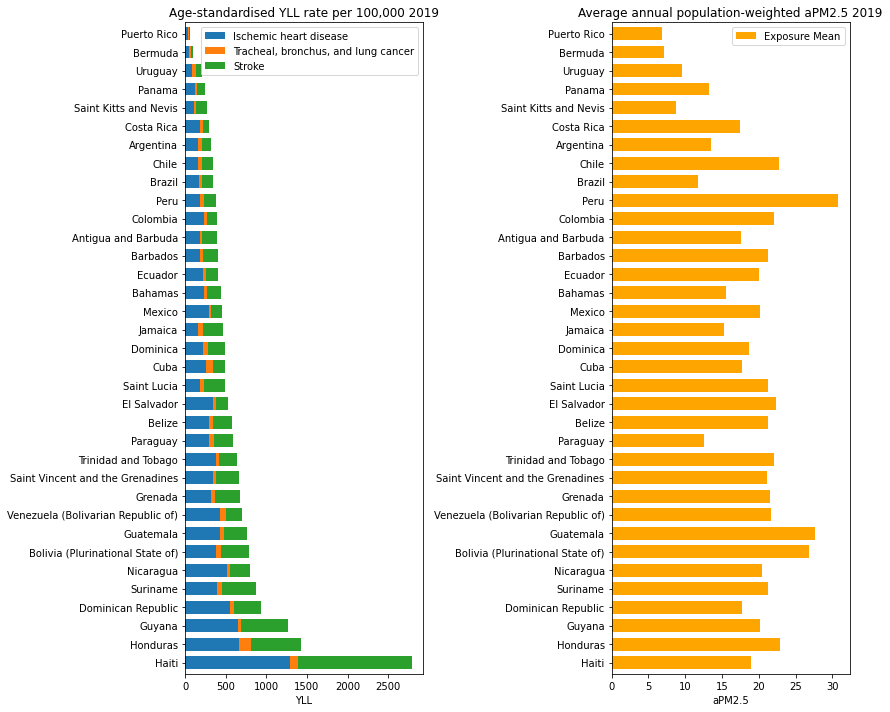

In [86]:
#Igual que plots anterior pero ponemos dos plots en uno mismo

#years of life lost (YLL) 2019
yll_ihd = filtrado_2 (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause = "All causes", Age = "Age-standardized", Sex= "Both sexes", Year= 2019)
# Agrupar por país y causa, y sumar los valores
df_grouped = yll_ihd.groupby(['Location', 'Cause'])['Value'].sum().unstack()
df_grouped = df_grouped.loc[df_grouped.sum(axis=1).sort_values(ascending=False).index]
# Datos de aPM25
data_pm25_2019 = data_pm[data_pm['Year'] == 2019]
data_pm25_2019 = data_pm25_2019.rename(columns={'Country':"Location"})
# Hacemos un merge pero es solo para ordenar los datos, despues los separamos otra vez
df_grouped_merge = pd.merge(df_grouped, data_pm25_2019, on='Location', how='inner')
# Generamos df por separado para hacer los plots
df_grouped_merge['suma'] = df_grouped_merge['Ischemic heart disease'] + df_grouped_merge['Stroke']+df_grouped_merge['Tracheal, bronchus, and lung cancer']
df_grouped_merge_plot_1 = df_grouped_merge[["Location","Ischemic heart disease", "Tracheal, bronchus, and lung cancer","Stroke"]]
df_grouped_merge_plot_2 = df_grouped_merge[["Location","Exposure Mean"]]
# Establecer la columna "Nombre" como índice
df_grouped_merge_plot_1.set_index('Location', inplace=True)
df_grouped_merge_plot_2.set_index('Location', inplace=True)

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
# Graficar en la primera subtrama
df_grouped_merge_plot_1.plot(kind='barh', stacked=True, width=0.7, ax=axes[0])
axes[0].set_title('Age-standardised YLL rate per 100,000 2019')
axes[0].set_xlabel('YLL')
axes[0].set_ylabel('')
#axes[0].set_ylabel('Eje Y')

# Graficar en la segunda subtrama

df_grouped_merge_plot_2.plot(kind='barh', width=0.7, ax=axes[1], color='orange')
axes[1].set_title('Average annual population-weighted aPM2.5 2019')
axes[1].set_xlabel('aPM2.5')
#axes[1].set_ylabel('Eje Y')
axes[1].set_ylabel('')
# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Figure 5. DARR change (%) and PMR change (%) for European countries
Se utilizó el cambio en la proporción de aPM2.5 (concentración anual promedio de partículas finas) y el cambio en la proporción de la tasa de DALY (Años de Vida Ajustados por Discapacidad) (DARR) para evaluar la capacidad de cada país para reducir su contaminación de aPM2.5 y los DALYs al menos hasta el nivel de disminución mediana europea dentro del período analizado.

<ipython-input-93-f94ef1fdab44>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DARR['DARR_1990'] =  DARR['value_1990'] / median_1990
<ipython-input-93-f94ef1fdab44>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DARR['DARR_2019'] =  DARR['value_2019'] / median_2019
<ipython-input-93-f94ef1fdab44>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

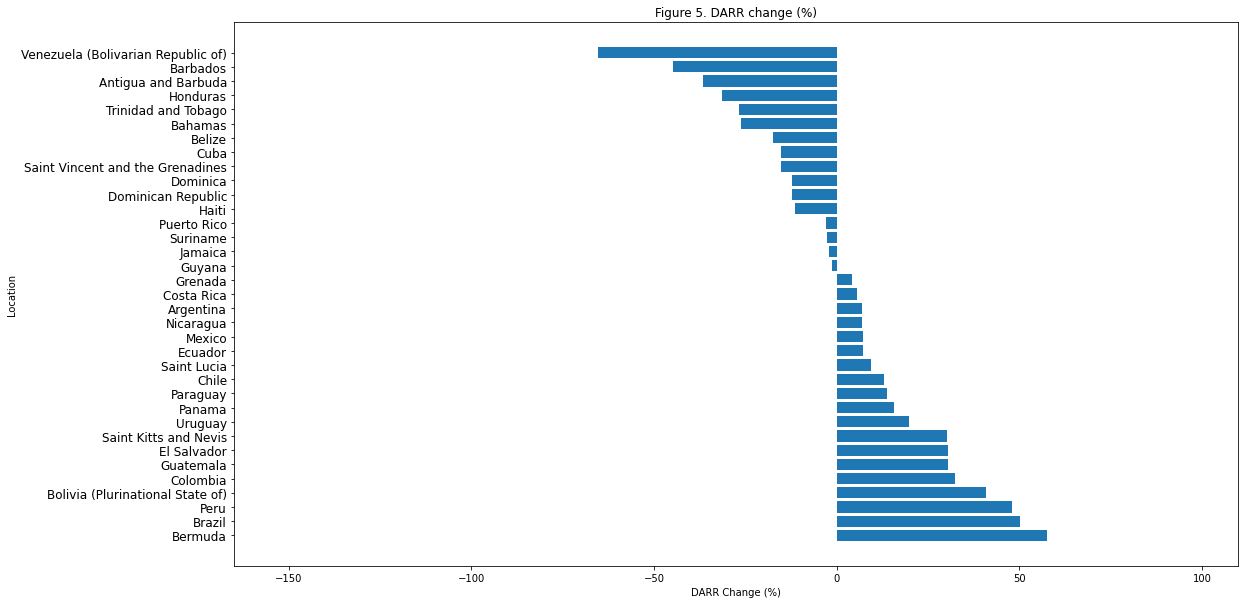

In [93]:
# Figure 5. DARR change (%) and PMR change (%) for European countries
# DARR
# DALY rate 1990 country
daly_rate_1990 = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=1990)
# DALY rate 1990 EU
median_1990 =daly_rate_1990['Value'].median()
# DALY rate 2019 country
daly_rate_2019 = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause= "All causes", Age = "Age-standardized", Sex= "Both sexes", Year=2019)
# DALY rate 2019 EU
median_2019 = daly_rate_2019['Value'].median()
# DARR change 1990-2019
daly_rate = pd.merge(daly_rate_1990, daly_rate_2019, on='Location', how='inner')
daly_rate.columns
daly_rate = daly_rate.rename(columns={'Value_x':"value_1990", 'Value_y':"value_2019"})
#Generamos un df nuevo y solo nos quedamos con las columnas del nombre de los paises y el % de cambio calculado
DARR = daly_rate[['Location', 'value_1990', 'value_2019']]
DARR
DARR['DARR_1990'] =  DARR['value_1990'] / median_1990
DARR['DARR_2019'] =  DARR['value_2019'] / median_2019

DARR['DARR_change_1990_2019'] = ((DARR['DARR_1990'] - DARR['DARR_2019'])/DARR['DARR_1990'])*100
DARR
DARR = DARR.sort_values(by='DARR_change_1990_2019',ascending=False)

### PLOT
# Generamos Gráfico de barras
plt.figure(figsize=(18, 10))
# Crear un gráfico de barras horizontales
plt.barh(DARR['Location'], DARR['DARR_change_1990_2019'], height=0.8)
plt.xlim(-165, 110) 
# Agregar etiquetas a los ejes
plt.xlabel('DARR Change (%)')
plt.ylabel('Location')
plt.yticks( fontsize=12)
# Agregar título
plt.title('Figure 5. DARR change (%)')

# Mostrar el gráfico
plt.show()

<ipython-input-101-2f1355cfe338>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PMR['PMR_1990'] =  PMR['value_1990'] / exposure_median_1990
<ipython-input-101-2f1355cfe338>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PMR['PMR_2019'] =  PMR['value_2019'] / exposure_median_2019
<ipython-input-101-2f1355cfe338>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

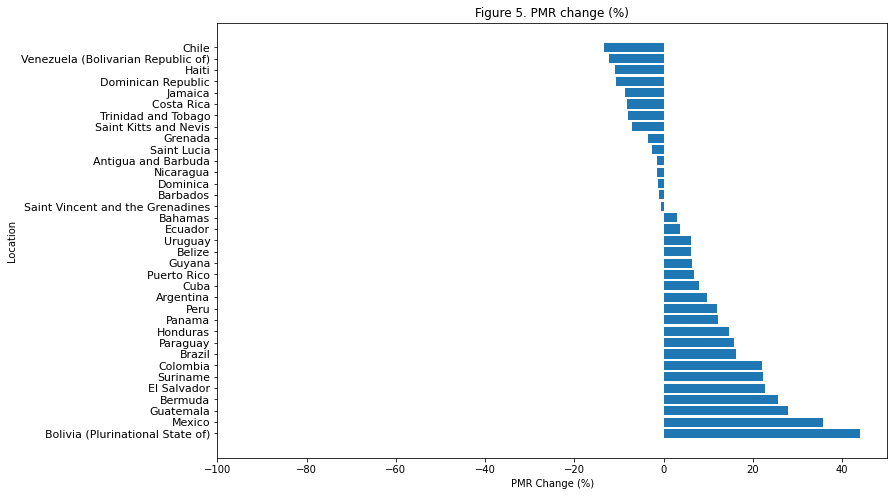

In [101]:
data_pm

# Figure 5. PMR change (%) and PMR change (%) for European countries

# DALY rate 1990 country
PMR_1990 = data_pm[data_pm['Year'] == 1990]
# DALY rate 1990 EU
exposure_median_1990 = PMR_1990['Exposure Mean'].median()
# DALY rate 2019 country
PMR_2019 = data_pm[data_pm['Year'] == 2019]# DALY rate 2019 EU
exposure_median_2019 = PMR_2019['Exposure Mean'].median()
# DARR change 1990-2019
PMR_merge = pd.merge(PMR_1990, PMR_2019, on='Country', how='inner')
PMR_merge
# daly_rate.columns
PMR_merge = PMR_merge.rename(columns={'Exposure Mean_x':"value_1990", 'Exposure Mean_y':"value_2019"})
# #Generamos un df nuevo y solo nos quedamos con las columnas del nombre de los paises y el % de cambio calculado
PMR_merge.columns
PMR = PMR_merge[['Country', 'value_1990', 'value_2019']]
#PMR
PMR['PMR_1990'] =  PMR['value_1990'] / exposure_median_1990
PMR['PMR_2019'] =  PMR['value_2019'] / exposure_median_2019

PMR['PMR_change_1990_2019'] = ((PMR['PMR_1990'] - PMR['PMR_2019'])/PMR['PMR_1990'])*100
# DARR
PMR = PMR.sort_values(by='PMR_change_1990_2019',ascending=False)
#print(PMR)
# ### PLOT
# # Generamos Gráfico de barras
plt.figure(figsize=(12, 8))
# Crear un gráfico de barras horizontales
plt.barh(PMR['Country'], PMR['PMR_change_1990_2019'], height=0.8)
plt.xlim(-100, 50) 
# Agregar etiquetas a los ejes
plt.xlabel('PMR Change (%)')
plt.ylabel('Location')
plt.yticks( fontsize=11)
# Agregar título
plt.title('Figure 5. PMR change (%)')

# Mostrar el gráfico
plt.show()

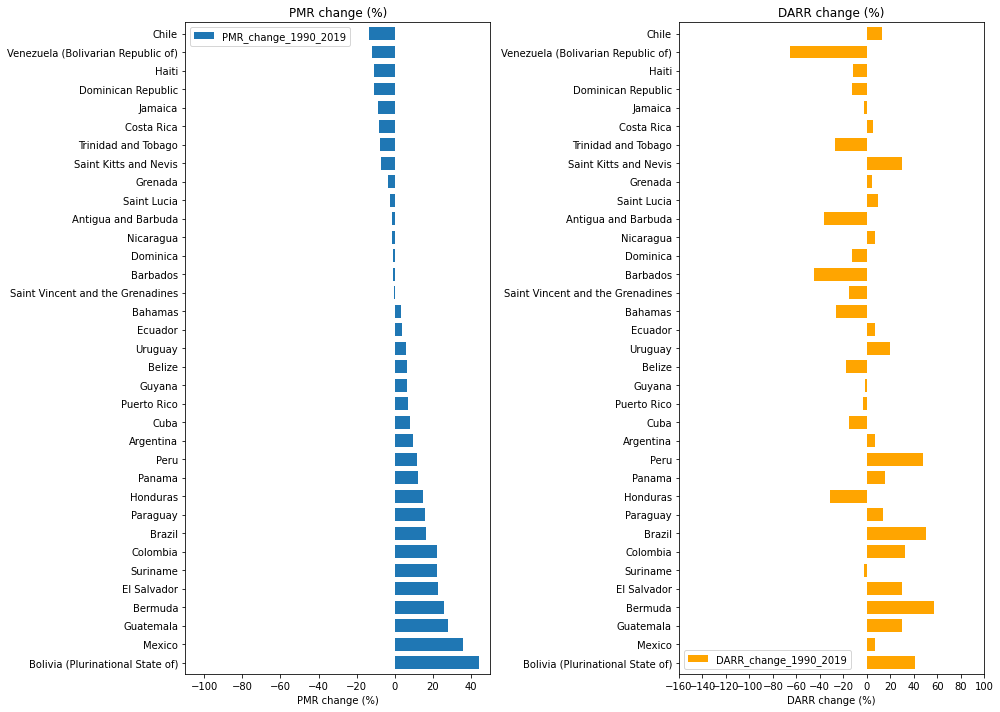

In [104]:
# Idem anterior pero ponemos los plots en el mismo como subplot
# Hacemos un pre-procesamiento para unir los dos df en uno mismo y ordenar los datos seguro PMR
PMR = PMR.rename(columns={'Country':"Location"})
merge_DARR_PMR = pd.merge(PMR, DARR, on='Location', how='inner')
merge_DARR_PMR.set_index('Location', inplace=True)
merge_DARR_PMR = merge_DARR_PMR.sort_values(by='PMR_change_1990_2019',ascending=False)
PMR_change_1990_2019 = merge_DARR_PMR[["PMR_change_1990_2019"]]
DARR_change_1990_2019 = merge_DARR_PMR[["DARR_change_1990_2019"]]

# Plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))
# Graficar en la primera subtrama
PMR_change_1990_2019.plot(kind='barh',width=0.7, ax=axes[0])
axes[0].set_title('PMR change (%)')
axes[0].set_xlabel('PMR change (%)')
axes[0].set_ylabel('')
axes[0].set_xlim(-110,50)  
#axes[0].set_ylabel('Eje Y')

# Graficar en la segunda subtrama

DARR_change_1990_2019.plot(kind='barh', width=0.7, ax=axes[1], color='orange')
axes[1].set_title('DARR change (%)')
axes[1].set_xlabel('DARR change (%)')
#axes[1].set_ylabel('Eje Y')
axes[1].set_ylabel('')
#axes[1].set_xlim(-190,110) 
axes[1].set_xticks(range(-160, 110, 20)) 
# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [106]:
print(DARR_change_1990_2019)
print(PMR_change_1990_2019)

                                    DARR_change_1990_2019
Location                                                 
Bolivia (Plurinational State of)                40.829969
Mexico                                           7.173653
Guatemala                                       30.374407
Bermuda                                         57.516266
El Salvador                                     30.342303
Suriname                                        -2.784199
Colombia                                        32.310980
Brazil                                          50.268254
Paraguay                                        13.800390
Honduras                                       -31.303871
Panama                                          15.692043
Peru                                            47.859172
Argentina                                        6.808896
Cuba                                           -15.368574
Puerto Rico                                     -2.812449
Guyana        

# Supplementary Figure S1: Median European aPM2.5 concentration from 1990 to 2019

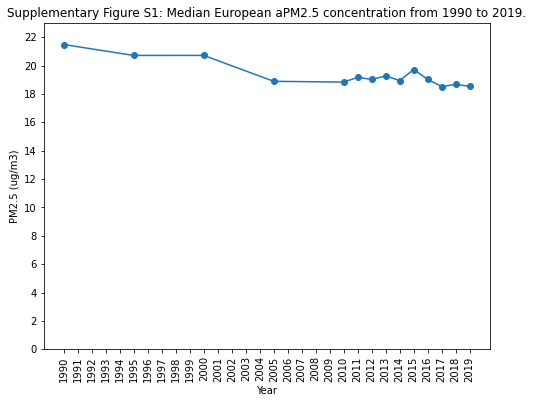

,Year,Exposure Mean
0,1990,21.491143
1,1995,20.721429
2,2000,20.724571
3,2005,18.897143
4,2010,18.843143
5,2011,19.178000
6,2012,19.029714
7,2013,19.277714
8,2014,18.950857
9,2015,19.730286


In [109]:

# Calcular el promedio de concentraciones por año
promedio_por_año = data_pm.groupby('Year')['Exposure Mean'].mean().reset_index()
promedio_por_año
# # Graficar el resultado
plt.figure(figsize=(8, 6))
plt.plot(promedio_por_año['Year'], promedio_por_año['Exposure Mean'], marker='o')
plt.xlabel('Year')
plt.ylabel('PM2.5 (ug/m3)')
plt.title('Supplementary Figure S1: Median European aPM2.5 concentration from 1990 to 2019.')
#plt.xlim(1990, 2019) 
plt.ylim(0, 23)
plt.yticks(range(0, 23, 2))
plt.xticks(range(1990,2020,1), rotation='vertical')
plt.show()
promedio_por_año

# Supplementary Figure S3

Spearman r =  0.589 p value =  0.0001977054698904784


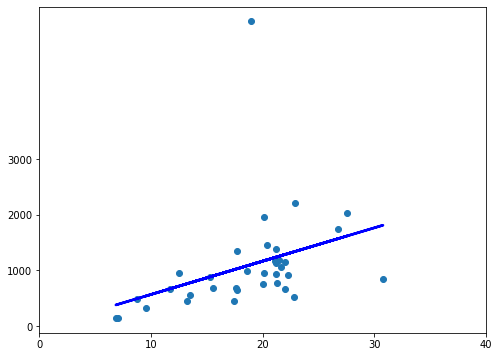

In [110]:
YLL_sup3 = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)

data_pm_2019 = data_pm[data_pm['Year'] == 2019]
len(data_pm_2019)
data_pm_2019 = data_pm_2019.rename(columns={'Country':"Location"})
# Union de las tablas de 1990 - 2019 para ser comparadas
supp3 = pd.merge(YLL_sup3, data_pm_2019, on='Location', how='inner')
supp3

slope_supp3 , intercept_supp3 , r_supp3 , _supp3 , stderr_supp3  = scipy.stats.linregress(supp3['Exposure Mean'] , supp3['Value'])

x = supp3['Exposure Mean'].values.reshape(-1,1)
y = supp3['Value'].values.reshape(-1,1)   
        
linear_regresion_supp = LinearRegression()
linear_regresion_supp.fit(x,y)
li_predict_supp = linear_regresion_supp.predict(x)




plt.figure(figsize=(8, 6))
plt.scatter(supp3['Exposure Mean'], supp3['Value'], marker='o')
plt.plot(x,li_predict_supp,c="blue",linestyle="-",linewidth=2.5)
plt.yticks(range(0, 3100, 1000))
plt.xticks(range(0,45,10))

# Calcular el coeficiente de Spearman
coef_spearman, p_value = spearmanr(supp3['Exposure Mean'], supp3['Value'])
print("Spearman r = ",round(coef_spearman,3),"p value = ", p_value)
       

# Supplementary Table S1

In [141]:
data_pm_2019 = data_pm[data_pm['Year'] == 2019]
data_pm_1990 = data_pm[data_pm['Year'] == 1990]
supp_tabla1 = pd.merge(data_pm_1990, data_pm_2019, on='Country', how='inner')
supp_tabla1 = supp_tabla1.rename(columns={'Exposure Mean_x':"Exposure Mean 1990", 'Exposure Mean_y':"Exposure Mean 2019"})
supp_tabla1_sub = supp_tabla1[["Country","Exposure Mean 1990","Exposure Mean 2019"]]
supp_tabla1_sub["difference"] = round(((supp_tabla1_sub["Exposure Mean 2019"] - supp_tabla1_sub["Exposure Mean 1990"])/supp_tabla1_sub["Exposure Mean 1990"])*100,1)

supp_tabla1_sub = supp_tabla1_sub.sort_values(by='Country')


### Media
media_lat_2019 = data_pm_2019["Exposure Mean"].mean()
media_lat_1990 = data_pm_1990["Exposure Mean"].mean()

# crear un intervalo de confianza del 95% 
CI_2019 = st.t.interval (alpha = 0.95, df = len (data_pm_2019) -1, loc = np.mean (data_pm_2019['Exposure Mean']), scale = st.sem (data_pm_2019['Exposure Mean']))
CI_1990 = st.t.interval (alpha = 0.95, df = len (data_pm_1990) -1, loc = np.mean (data_pm_1990['Exposure Mean']), scale = st.sem (data_pm_1990['Exposure Mean']))

print("La exposición promedio de aPM2.5 (PM2.5 ambiente)  fue de",round(media_lat_1990,2),"μg/m3 (IC del 95%:", round(CI_1990[0],2),"-", round(CI_1990[1],2), ") en 1990")
#mientras que en 2019 fue un 13.4% más baja, alcanzando los 18.49μg/m3 (IC del 95%: 16.3–20.3).")
print("La exposición promedio de aPM2.5 (PM2.5 ambiente)  fue de",round(media_lat_2019,2),"μg/m3 (IC del 95%:", round(CI_2019[0],2),"-", round(CI_2019[1],2), ") en 2019")
print("Es decir, ", round(((media_lat_2019-media_lat_1990)/media_lat_1990)*100,2), "% mas baja")
supp_tabla1_sub

La exposición promedio de aPM2.5 (PM2.5 ambiente)  fue de 21.49 μg/m3 (IC del 95%: 18.46 - 24.52 ) en 1990
La exposición promedio de aPM2.5 (PM2.5 ambiente)  fue de 18.54 μg/m3 (IC del 95%: 16.64 - 20.45 ) en 2019
Es decir,  -13.71 % mas baja


<ipython-input-141-2ed3b4e9f1d1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  supp_tabla1_sub["difference"] = round(((supp_tabla1_sub["Exposure Mean 2019"] - supp_tabla1_sub["Exposure Mean 1990"])/supp_tabla1_sub["Exposure Mean 1990"])*100,1)


,Country,Exposure Mean 1990,Exposure Mean 2019,difference
0,Antigua and Barbuda,18.10,17.60,-2.8
1,Argentina,15.60,13.50,-13.5
2,Bahamas,16.80,15.60,-7.1
3,Barbados,22.00,21.30,-3.2
4,Belize,23.60,21.20,-10.2
34,Bermuda,9.93,7.07,-28.8
5,Bolivia (Plurinational State of),50.00,26.80,-46.4
6,Brazil,14.60,11.70,-19.9
7,Chile,21.00,22.80,8.6
8,Colombia,29.50,22.00,-25.4


In [145]:
# Paises que redujeron y que aumentaron su concentración anual ponderada por la población de partículas finas (aPM2.5)
paises_reduccion = supp_tabla1_sub[supp_tabla1_sub['difference']<0]
paises_aumentaron = supp_tabla1_sub[supp_tabla1_sub['difference'] > 0]
print("Paises que redujeron las concentraciones: ",len(paises_reduccion))
print("Paises que aumentaron las concentraciones: ",len(paises_aumentaron))

Paises que redujeron las concentraciones:  27
Paises que aumentaron las concentraciones:  8


# Supplementary Table S2. Deaths, age-standardised death rates and DALY rate attributable to air pollution for European countries in 2019.

In [112]:
sup_tabla_2_muertes_num = filtrado (data = data, Measure = "Deaths", Metric = 'Number', Risk = 'Air pollution', Cause='All causes', Age = "All ages", Sex="Both sexes", Year=2019)
len(sup_tabla_2_muertes_num)
sup_tabla_2_muertes_rate = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
len(sup_tabla_2_muertes_rate)
sup_tabla_2_muertes_rate

sup_tabla_2_DALYs_rate = filtrado (data = data, Measure = "DALYs", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
len(sup_tabla_2_DALYs_rate)
sup_tabla_2_DALYs_rate

sup_tabla_2 = pd.merge(sup_tabla_2_muertes_num, sup_tabla_2_muertes_rate, on='Location', how='inner')
sup_tabla_2 = sup_tabla_2.rename(columns={'Value_x':"muertes_num", 'Value_y':"muertes_rate"})
sup_tabla_2 = sup_tabla_2[["Location","muertes_num","muertes_rate"]]
sup_tabla_2 = pd.merge(sup_tabla_2, sup_tabla_2_DALYs_rate, on='Location', how='inner')

sup_tabla_2 = sup_tabla_2.rename(columns={'Value':"DALYs_rate"})
sup_tabla_2 = sup_tabla_2[["Location","muertes_num","muertes_rate","DALYs_rate"]]
sup_tabla_2 = sup_tabla_2.sort_values(by='Location')
sup_tabla_2

,Location,muertes_num,muertes_rate,DALYs_rate
31,Antigua and Barbuda,30.495864,33.354500,841.970495
11,Argentina,13777.693490,25.404859,628.206430
13,Bahamas,102.294786,28.088365,811.384132
28,Barbados,175.099177,36.612677,950.000063
9,Belize,124.351536,47.243371,1298.066610
29,Bermuda,9.618290,7.258381,190.774765
33,Bolivia (Plurinational State of),6254.744838,76.702092,1920.361821
6,Brazil,60914.604200,27.072228,763.320640
21,Chile,6244.415814,26.471187,660.232277
0,Colombia,15711.091450,29.330504,826.823832


# Supplementary Table S3. Ratio of YLL rate attributable to air pollution and death rate attributable to air pollution in 1990 and 2019 for European countries.

In [114]:
YLL_2019 = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
YLL_1990 = filtrado (data = data, Measure = "YLLs", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=1990)
print(len(YLL_2019))
print(len(YLL_1990))
# 
YLL_2019 = YLL_2019[['Location', "Value"]]
YLL_1990 = YLL_1990[['Location', "Value"]]

YLL_merge = pd.merge(YLL_1990, YLL_2019, on='Location', how='inner')
YLL_merge = YLL_merge.rename(columns={'Value_x':"YLL_1990", 'Value_y':"YLL_2019"})
# Medianas Europeas
YLL_1990_median = YLL_merge['YLL_1990'].median()
YLL_2019_median =YLL_merge['YLL_2019'].median()

# YRR 1990
YLL_merge['YRR_1990'] = YLL_merge['YLL_1990'] / YLL_1990_median
# YRR 2019
YLL_merge['YRR_2019'] = YLL_merge['YLL_2019'] / YLL_2019_median

# YRR change (%)
YLL_merge['YRR_change'] = round(((YLL_merge['YRR_1990'] - YLL_merge['YRR_2019'])/YLL_merge['YRR_1990'] )*100,2)
YLL_merge = YLL_merge.sort_values(by='Location')
YLL_merge

35
35


,Location,YLL_1990,YLL_2019,YRR_1990,YRR_2019,YRR_change
0,Antigua and Barbuda,1080.46,685.27,0.539275,0.740800,-37.37
2,Argentina,1230.58,548.86,0.614203,0.593337,3.40
7,Bahamas,1139.60,678.39,0.568793,0.733363,-28.93
4,Barbados,1148.22,781.61,0.573096,0.844947,-47.44
5,Belize,2003.54,1130.00,1.000000,1.221569,-22.16
28,Bermuda,807.91,152.00,0.403241,0.164317,59.25
13,Bolivia (Plurinational State of),6105.65,1745.70,3.047431,1.887162,38.07
24,Brazil,2802.90,665.92,1.398974,0.719882,48.54
3,Chile,1350.39,524.48,0.674002,0.566981,15.88
15,Colombia,2159.82,657.62,1.078002,0.710910,34.05


In [115]:
Deaths_2019 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=2019)
Deaths_1990 = filtrado (data = data, Measure = "Deaths", Metric = 'Rate', Risk = 'Air pollution', Cause='All causes', Age = "Age-standardized", Sex="Both sexes", Year=1990)
print(len(Deaths_2019))
print(len(Deaths_1990))
# 
Deaths_2019 = Deaths_2019[['Location', "Value"]]
Deaths_1990 = Deaths_1990[['Location', "Value"]]

Deaths_merge = pd.merge(Deaths_1990, Deaths_2019, on='Location', how='inner')
Deaths_merge = Deaths_merge.rename(columns={'Value_x':"DRR_1990", 'Value_y':"DRR_2019"})
# Medianas Europeas
DRR_1990_median = Deaths_merge['DRR_1990'].median()
DRR_2019_median =Deaths_merge['DRR_2019'].median()

# YRR 1990
Deaths_merge['DRR_1990'] = Deaths_merge['DRR_1990'] / DRR_1990_median
# YRR 2019
Deaths_merge['DRR_2019'] = Deaths_merge['DRR_2019'] / DRR_2019_median

# YRR change (%)
Deaths_merge['DRR_change'] = round(((Deaths_merge['DRR_1990'] - Deaths_merge['DRR_2019'])/Deaths_merge['DRR_1990'] )*100,2)
Deaths_merge = Deaths_merge.sort_values(by='Location')
Deaths_merge

35
35


,Location,DRR_1990,DRR_2019,DRR_change
0,Antigua and Barbuda,0.584944,0.803422,-37.35
16,Argentina,0.625667,0.611936,2.19
23,Bahamas,0.563800,0.676575,-20.00
9,Barbados,0.632665,0.881903,-39.40
21,Belize,0.977700,1.137969,-16.39
29,Bermuda,0.468556,0.174835,62.69
8,Bolivia (Plurinational State of),2.244871,1.847552,17.70
20,Brazil,1.210510,0.652099,46.13
14,Chile,0.791419,0.637621,19.43
10,Colombia,1.053083,0.706495,32.91


La exposición promedio de aPM2.5 (PM2.5 ambiente) de los países Latinoamericanos fue de 21.31 μg/m3 (IC del 95%: 18.3–24.3) en 1990, mientras que en 2019 fue un 13.4% más baja,  alcanzando los 18.49μg/m3 (IC del 95%: 16.3–20.3).

In [122]:
data_pm_2019

,Exposure Id,Type,Country,ISO3,Region,Name,Exposure Lower,Exposure Mean,Exposure Upper,Year,Pollutant,Pollutant Name,Region Name
13,32144,country,Antigua and Barbuda,ATG,region,Caribbean,8.52,17.60,31.50,2019,pm25,PM25,GBD Regions
27,31976,country,Argentina,ARG,region,Southern Latin America,10.40,13.50,17.50,2019,pm25,PM25,GBD Regions
41,32186,country,Bahamas,BHS,region,Caribbean,7.05,15.60,29.20,2019,pm25,PM25,GBD Regions
55,32228,country,Barbados,BRB,region,Caribbean,10.40,21.30,37.80,2019,pm25,PM25,GBD Regions
69,32270,country,Belize,BLZ,region,Caribbean,8.54,21.20,42.70,2019,pm25,PM25,GBD Regions
83,32774,country,Bolivia (Plurinational State of),BOL,region,Andean Latin America,17.90,26.80,38.00,2019,pm25,PM25,GBD Regions
97,37352,country,Brazil,BRA,region,Tropical Latin America,9.82,11.70,14.00,2019,pm25,PM25,GBD Regions
111,32018,country,Chile,CHL,region,Southern Latin America,19.30,22.80,26.50,2019,pm25,PM25,GBD Regions
125,32900,country,Colombia,COL,region,Central Latin America,17.40,22.00,27.70,2019,pm25,PM25,GBD Regions
139,32942,country,Costa Rica,CRI,region,Central Latin America,14.60,17.40,20.70,2019,pm25,PM25,GBD Regions
